In [1]:
import pandas as pd
from matplotlib.offsetbox import AnchoredText
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import numpy as np

# 1. Global Earthquakes

In this problem set, we will use this file from the USGS Earthquakes Database. The dataset is similar to the one you use in Assignment 02. Use the file provided (usgs_earthquakes.csv) to recreate the following map. Use the mag column for magnitude. 

In [2]:
#read data
earthquakes=pd.read_csv('usgs_earthquakes.csv')
#select time, latitude, longitude and mag
earthquakes=earthquakes[['time','latitude','longitude','mag']]
#select top 50 earthquakes
top50=earthquakes.sort_values("mag", ascending=False).iloc[0:50]

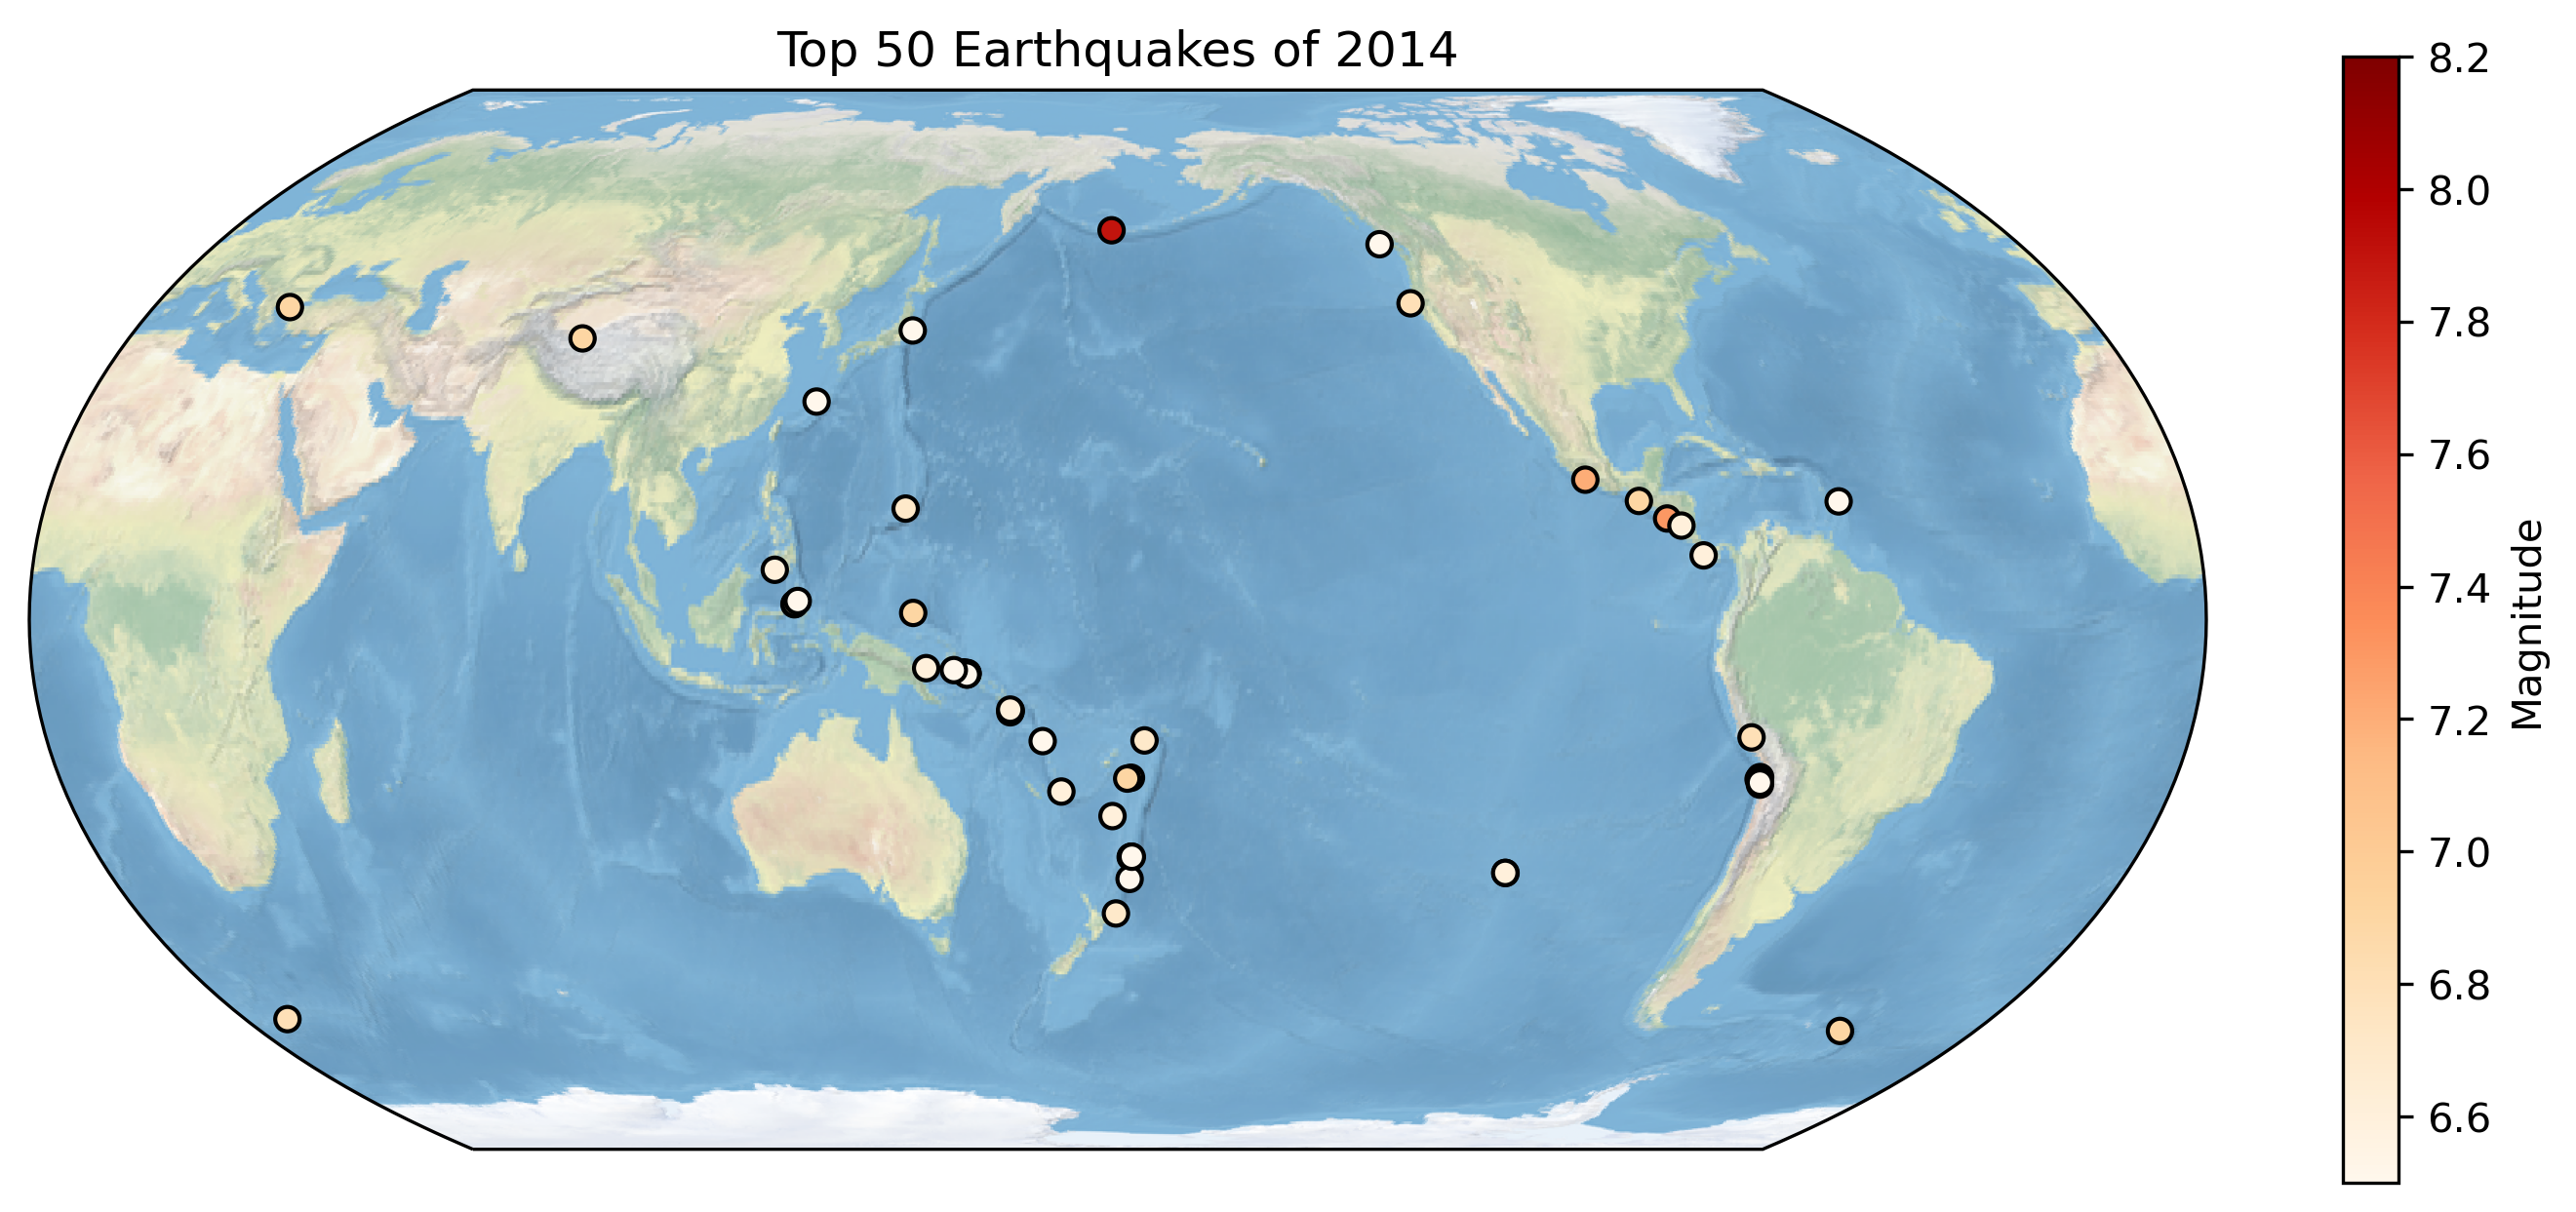

In [3]:
fig = plt.figure(figsize=(12,5), dpi=300)
ax = plt.axes(projection=ccrs.EqualEarth(central_longitude=180))#select EqualEarth projection and center longitude is 180

ax.set_global()
#add image
ax.stock_img()
#plot top 50 Earthquakes
scatter = ax.scatter(top50['longitude'], top50['latitude'],c=top50['mag'], cmap='OrRd', edgecolor='k', transform=ccrs.PlateCarree())
cbar = plt.colorbar(scatter, ax=ax, label='Magnitude')
#add title
plt.title('Top 50 Earthquakes of 2014')
plt.show()

# 2. Explore a netCDF dataset
Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) website. Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. But the dataset should be in netCDF format. For this problem set, you are welcome to use the same dataset you used in Assignment 03.

## 2.1
Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box 

In [4]:
#This dataset is from CMIP6, about future globle precipitation using CMCC-ESM2 model in ssp126 situation
#load data
pr=xr.open_dataset('pr_day_CMCC-ESM2_ssp126_r1i1p1f1_gn_20400101-20641231.nc',engine = 'netcdf4')
#change the unit from kg m-2 s-1 to mm which is more commonly used
pr=pr.pr*24*3600

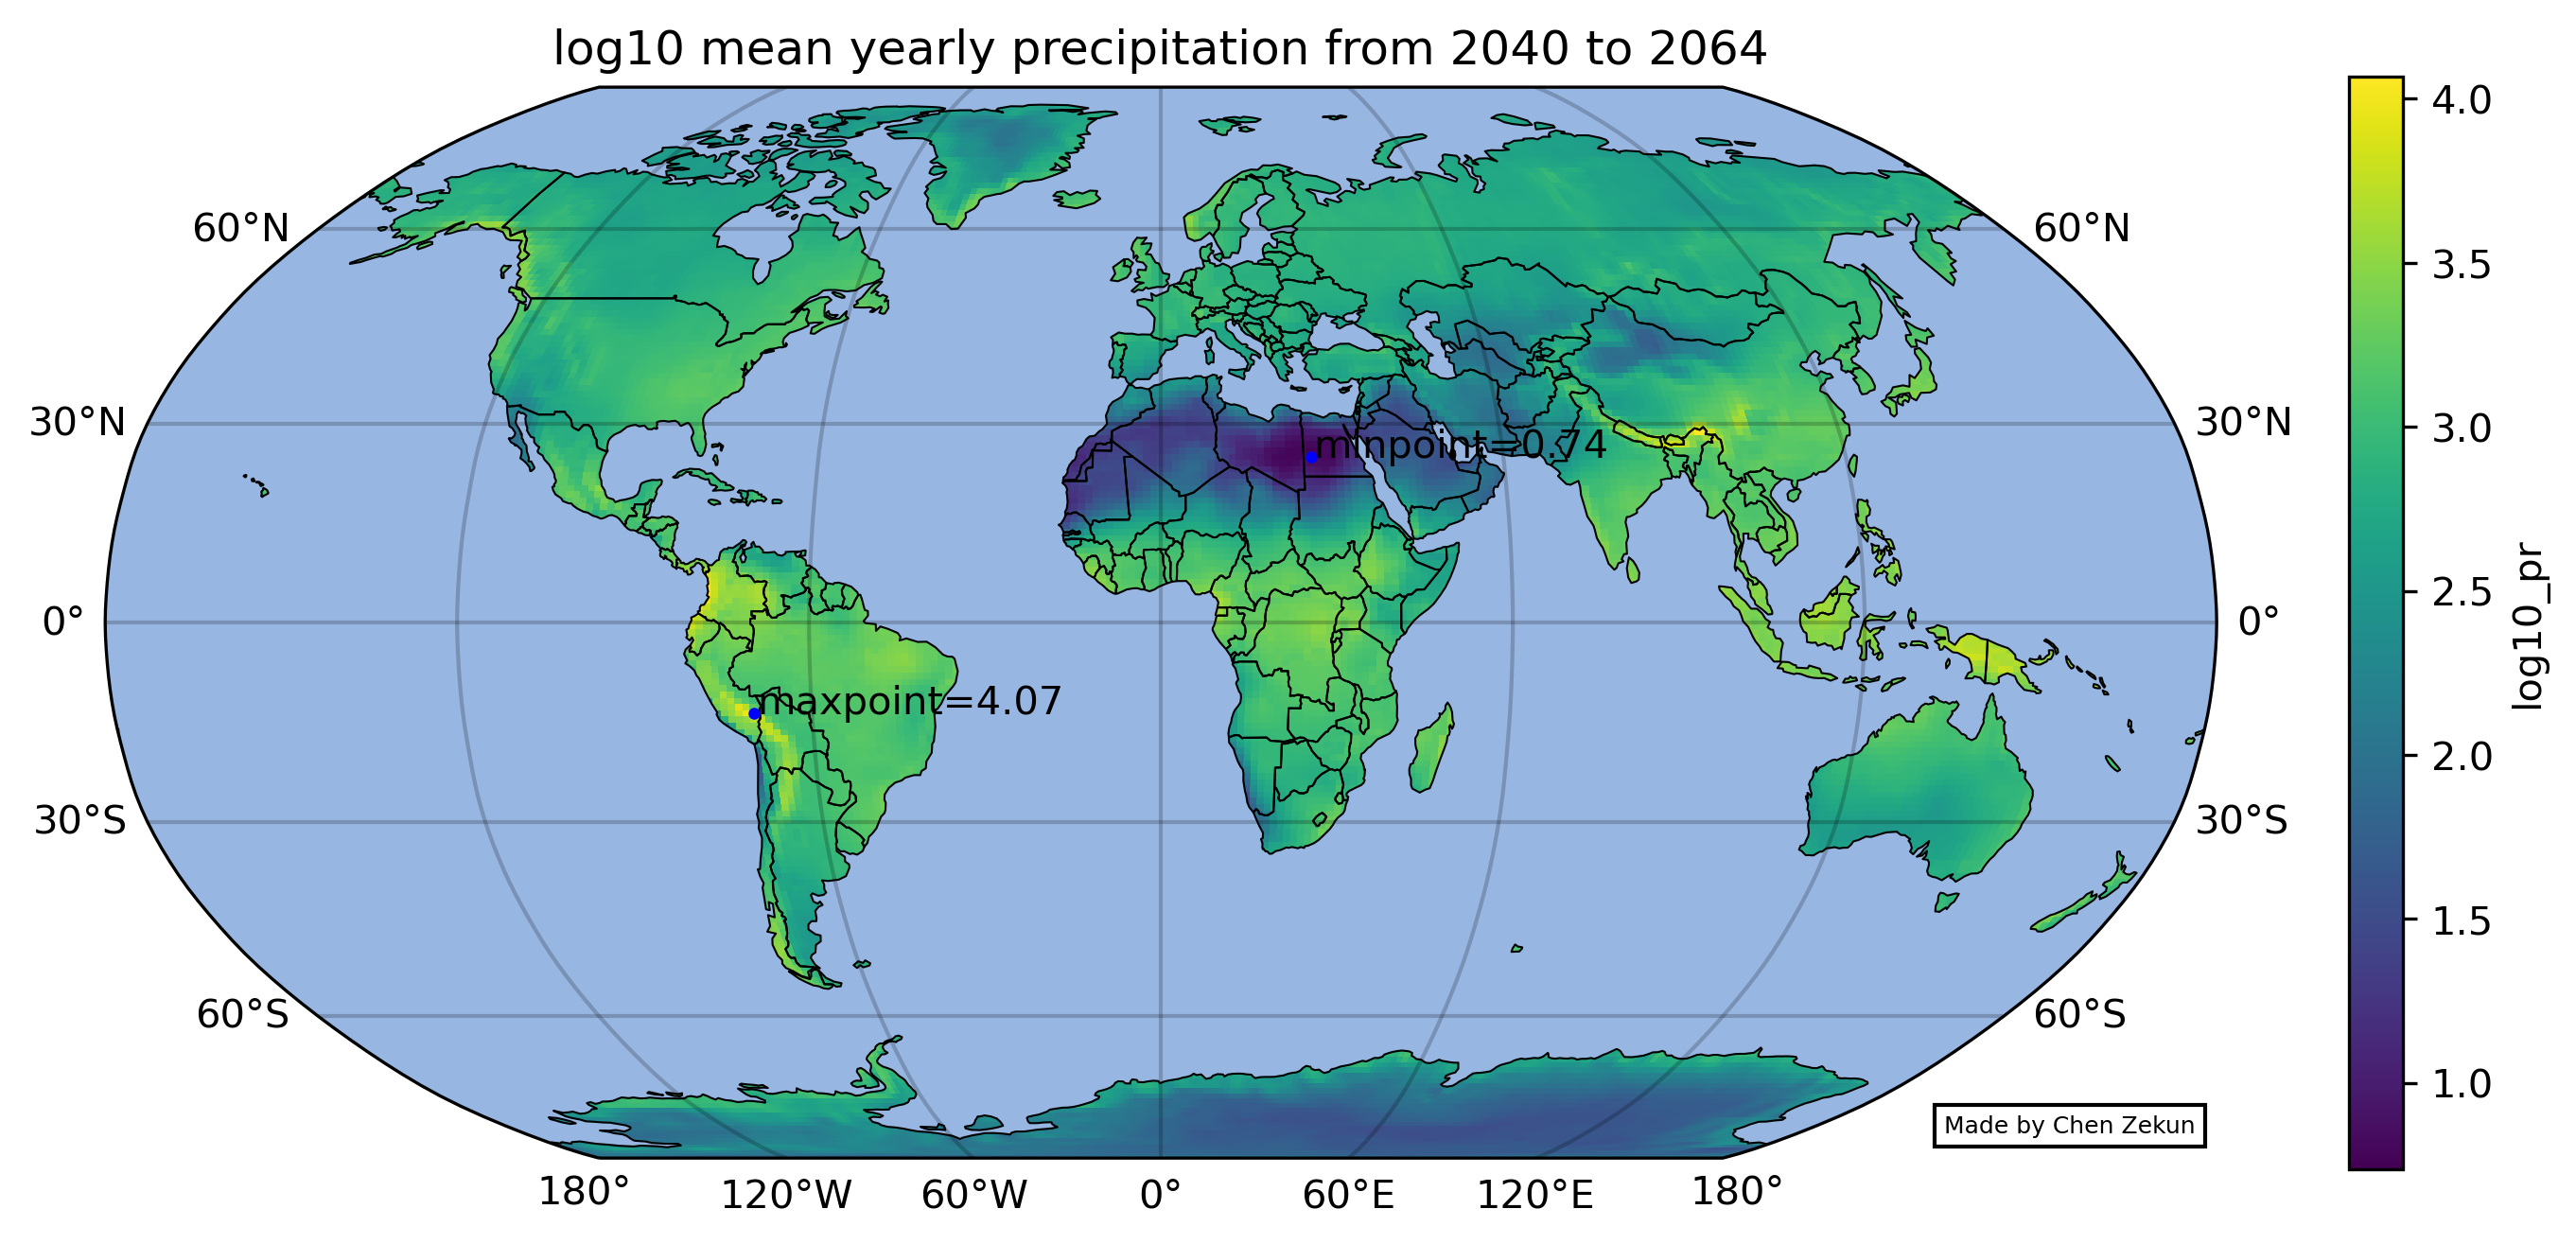

In [5]:
#calculate mean-yearly precipitation
mean_yearly_pr=pr.resample(time='Y').sum(dim='time').mean(dim='time')
#calculate log10 mean-yearly precipitation to show more information
log_mean_yearly_pr=np.log10(mean_yearly_pr)
fig = plt.figure(figsize=(12,5), dpi=300)
#select Robinson projection
proj = ccrs.Robinson()
ax = plt.axes(projection=proj)
#plot
log_mean_yearly_pr.plot(ax=ax, transform=ccrs.PlateCarree()).colorbar.set_label('log10_pr')
#mask using ocean
ax.add_feature(cfeature.OCEAN, zorder=1)
# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))
#add title
plt.title('log10 mean yearly precipitation from 2040 to 2064')
#add lat/lon gridlines, draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.2, draw_labels=True)
gl.top_labels = False
#get minpoint and maxpiont information
max_lat=log_mean_yearly_pr.where(log_mean_yearly_pr==log_mean_yearly_pr.max(), drop=True).lat
max_lon=log_mean_yearly_pr.where(log_mean_yearly_pr==log_mean_yearly_pr.max(), drop=True).lon
max_data=log_mean_yearly_pr.where(log_mean_yearly_pr==log_mean_yearly_pr.max(), drop=True).data
min_lat=log_mean_yearly_pr.where(log_mean_yearly_pr==log_mean_yearly_pr.min(), drop=True).lat
min_lon=log_mean_yearly_pr.where(log_mean_yearly_pr==log_mean_yearly_pr.min(), drop=True).lon
min_data=log_mean_yearly_pr.where(log_mean_yearly_pr==log_mean_yearly_pr.min(), drop=True).data
#add annotation about minpiont and max point
plt.plot(max_lon, max_lat, color='blue', marker='o', markersize=2, transform=ccrs.PlateCarree())
plt.text(max_lon+0.5, max_lat, 'maxpoint='+str(round(max_data.item(),2)),horizontalalignment='left',transform=ccrs.PlateCarree())
plt.plot(min_lon, min_lat, color='blue', marker='o', markersize=2, transform=ccrs.PlateCarree())
plt.text(min_lon+0.5, min_lat, 'minpoint='+str(round(min_data.item(),2)),horizontalalignment='left',transform=ccrs.PlateCarree())
#add text
text = AnchoredText('Made by Chen Zekun', loc=4, prop={'size': 6}, frameon=True)
ax.add_artist(text)

## 2.2
Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box

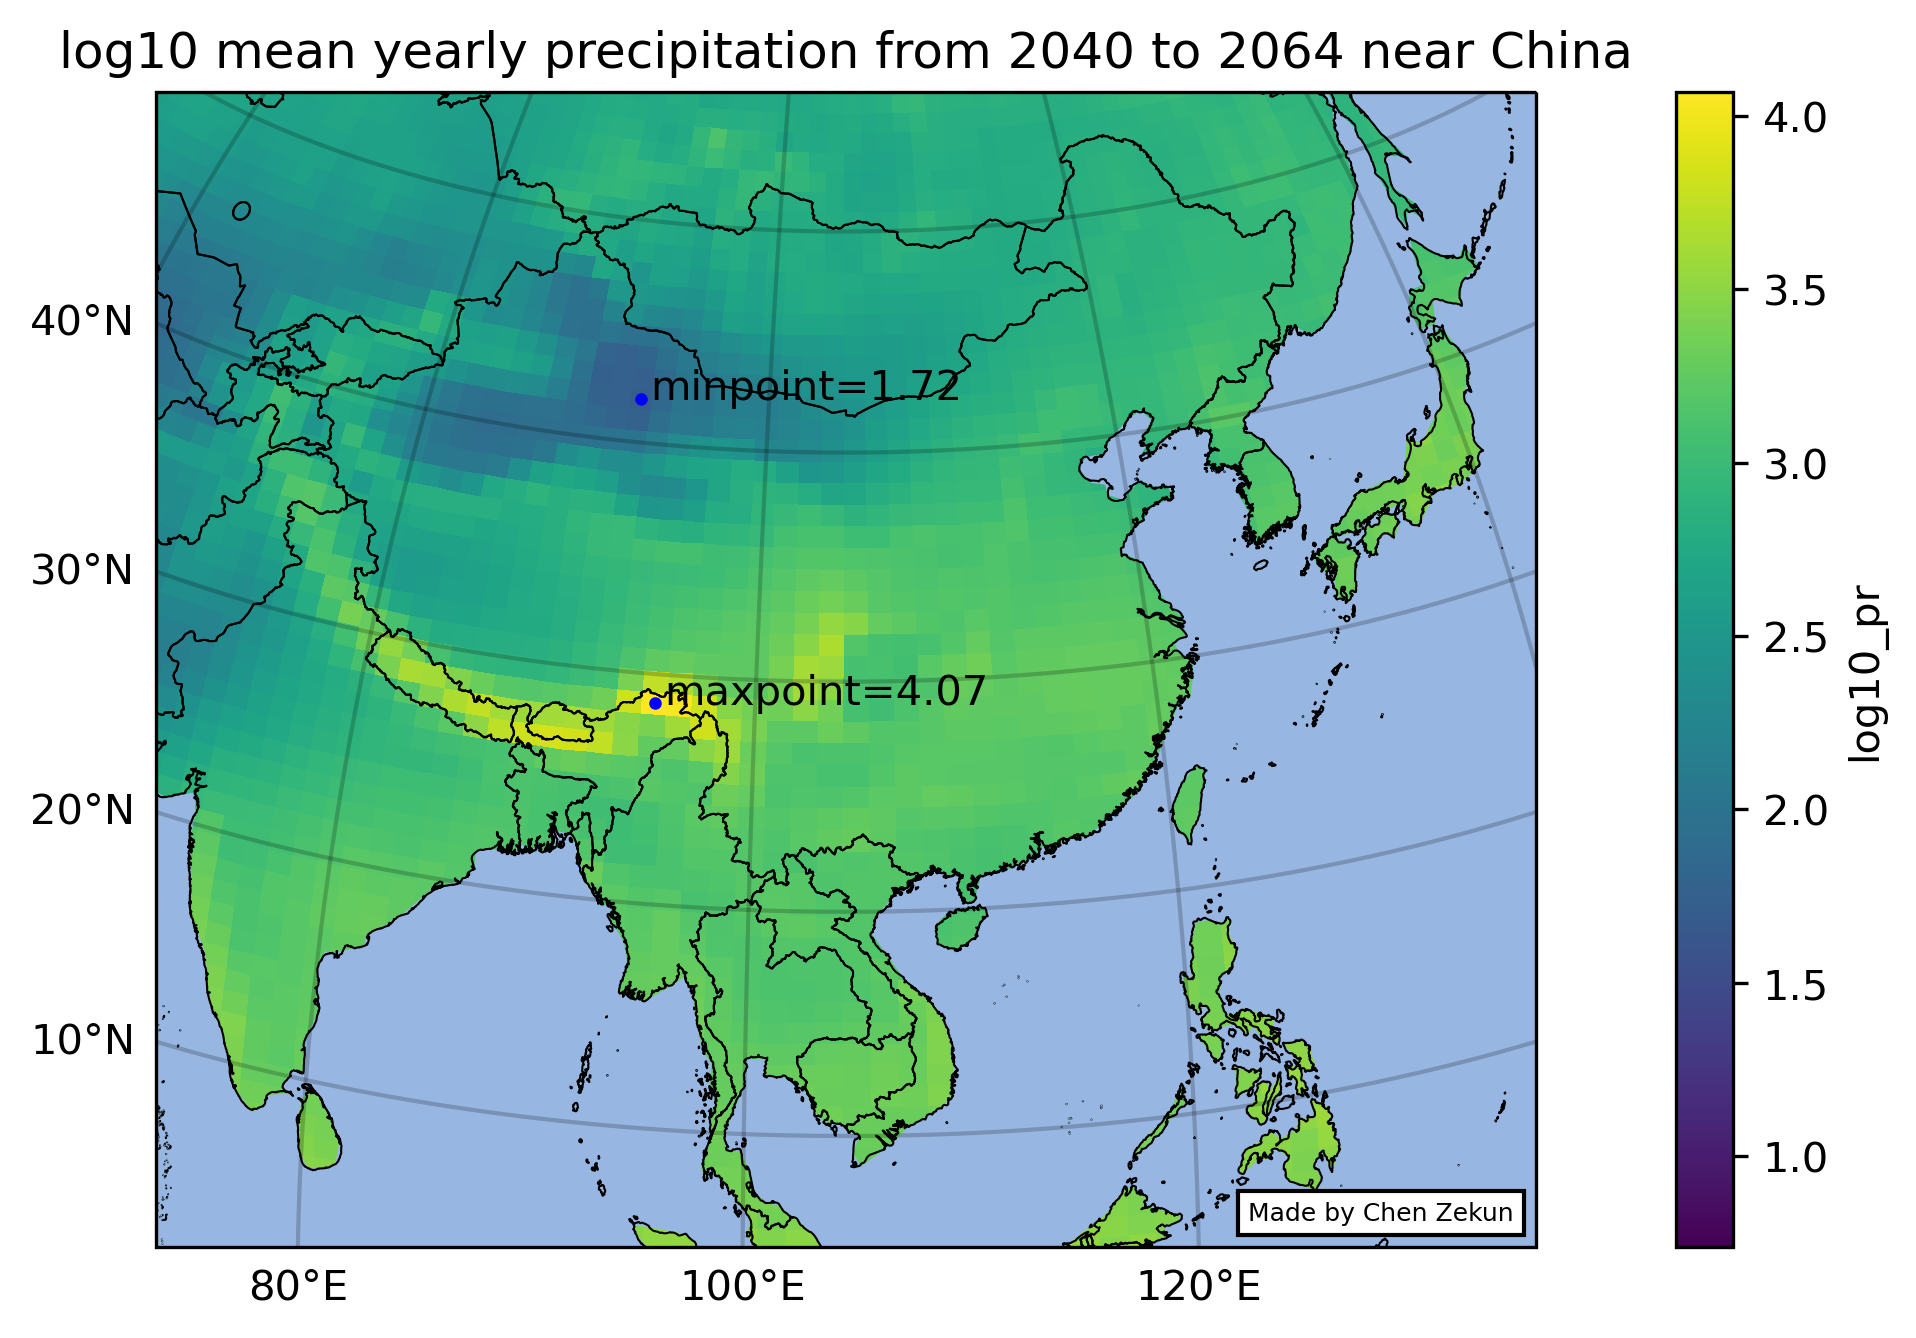

In [6]:
#calculate mean-yearly precipitation
mean_yearly_pr=pr.resample(time='Y').sum(dim='time').mean(dim='time')
#calculate log10 mean-yearly precipitation to show more information
log_mean_yearly_pr=np.log10(mean_yearly_pr)
fig = plt.figure(figsize=(12,5), dpi=300)
#select Orthographic projection
proj = ccrs.Orthographic(central_longitude=104.5,central_latitude=28.5)         
ax = plt.axes(projection=proj)
#plot
log_mean_yearly_pr.plot(ax=ax, transform=ccrs.PlateCarree()).colorbar.set_label('log10_pr')
#select region near China
extent = [73, 136, 3, 54]
ax.set_extent(extent)
#mask using ocean
ax.add_feature(cfeature.OCEAN, zorder=1)
# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='10m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))
#add lat/lon gridlines, draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.2, draw_labels=["bottom", "left"])
#calculate mean-yearly precipitation near China
mean_yearly_pr=pr.resample(time='Y').sum(dim='time').sel(lon=slice(73,136),lat=slice(3,54)).mean(dim='time')
#calculate log10 mean-yearly precipitation near China
log_mean_yearly_pr=np.log10(mean_yearly_pr)
#get minpoint and maxpiont information near China
max_lat=log_mean_yearly_pr.where(log_mean_yearly_pr==log_mean_yearly_pr.max(), drop=True).lat
max_lon=log_mean_yearly_pr.where(log_mean_yearly_pr==log_mean_yearly_pr.max(), drop=True).lon
max_data=log_mean_yearly_pr.where(log_mean_yearly_pr==log_mean_yearly_pr.max(), drop=True).data
min_lat=log_mean_yearly_pr.where(log_mean_yearly_pr==log_mean_yearly_pr.min(), drop=True).lat
min_lon=log_mean_yearly_pr.where(log_mean_yearly_pr==log_mean_yearly_pr.min(), drop=True).lon
min_data=log_mean_yearly_pr.where(log_mean_yearly_pr==log_mean_yearly_pr.min(), drop=True).data
#add annotation about minpiont and max point
plt.plot(max_lon, max_lat, color='blue', marker='o', markersize=2, transform=ccrs.PlateCarree())
plt.text(max_lon+0.5, max_lat, 'maxpoint='+str(round(max_data.item(),2)),horizontalalignment='left',transform=ccrs.PlateCarree())
plt.plot(min_lon, min_lat, color='blue', marker='o', markersize=2, transform=ccrs.PlateCarree())
plt.text(min_lon+0.5, min_lat, 'minpoint='+str(round(min_data.item(),2)),horizontalalignment='left',transform=ccrs.PlateCarree())
#add title
plt.title('log10 mean yearly precipitation from 2040 to 2064 near China')

#add text
text = AnchoredText('Made by Chen Zekun',loc=4, prop={'size': 6}, frameon=True)
ax.add_artist(text)